In [2]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [3]:
library(ggplot2)
library(ggthemes)

In [31]:
df = read.csv("../data/activity_inequality_walkscore_uscities_wincome_20170508.csv")

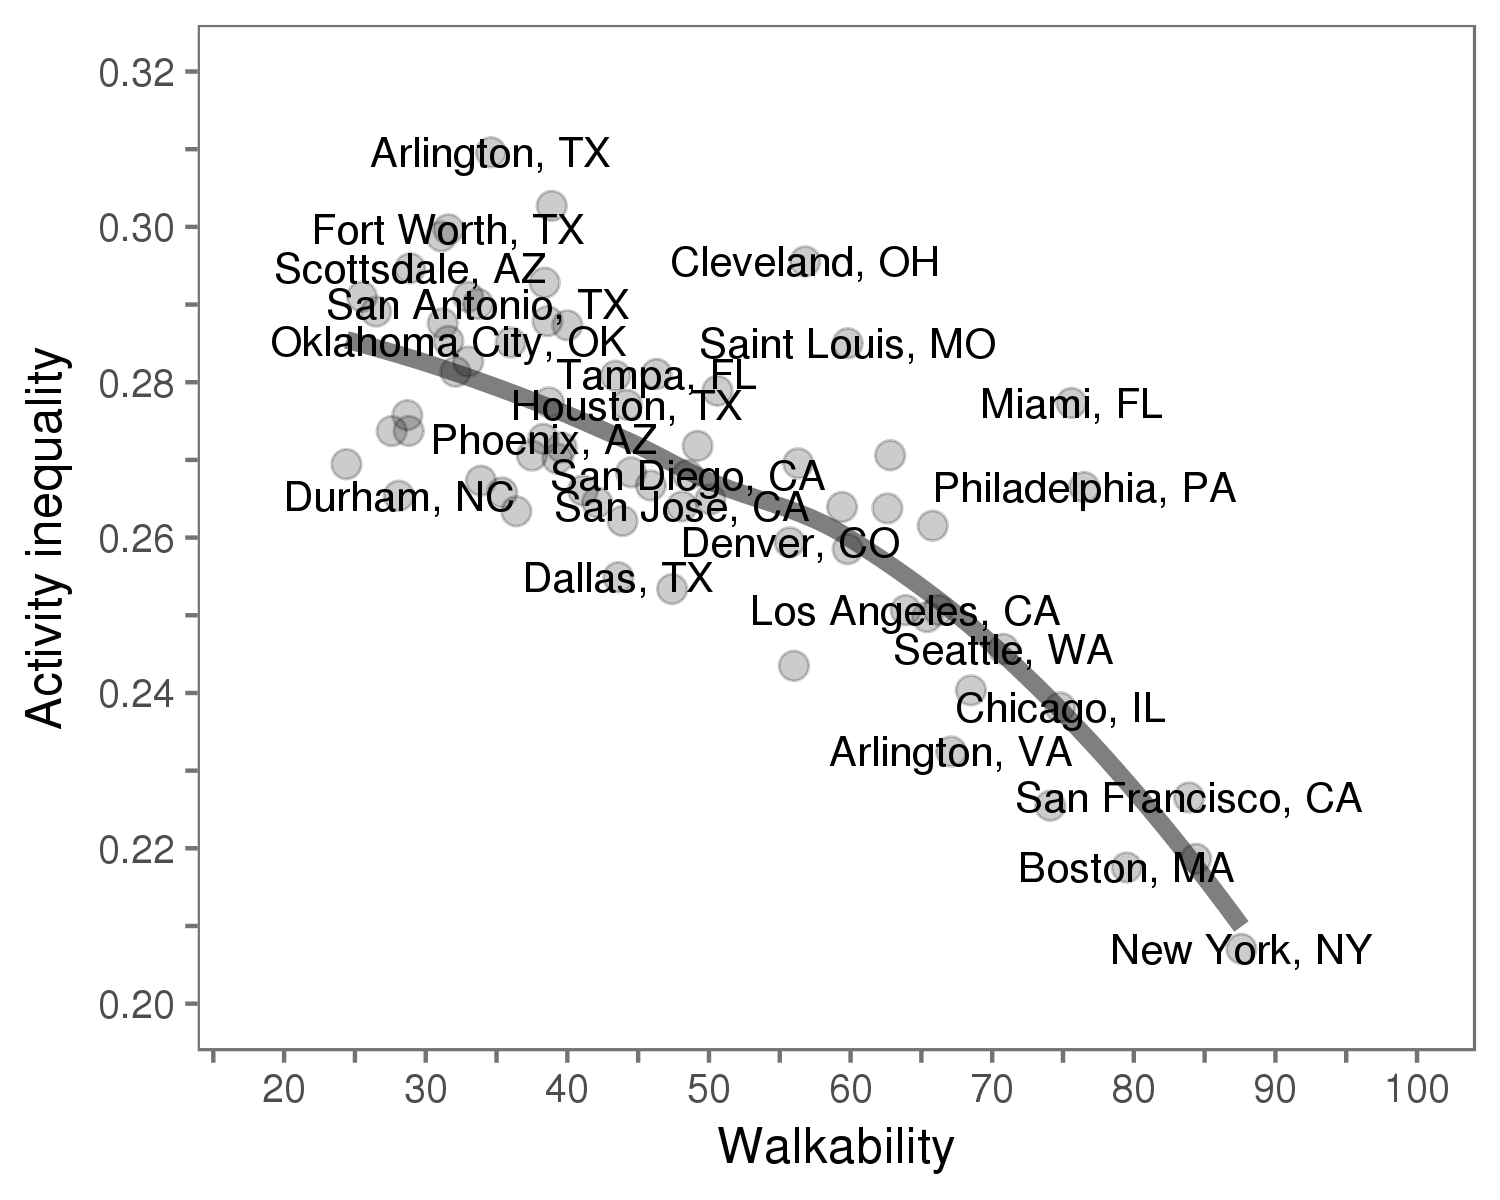

In [32]:
p <- ggplot(df, aes(walkability, gini, label=city))
p <- p + geom_smooth(aes(group=1), method="loess",span=.9,  se = F, size=2.0, color="gray50", alpha=1.0, method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + ylab("Activity inequality") + xlab("Walkability")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")

# yticks
ticks = seq(.20,.32,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels, limits=c(.20, .32))
# xticks
ticks = seq(0,100,by=5) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%d", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(18, 100))

p

ggsave(filename="../output/fig3a.pdf", plot=p, width=4, height=3)

Higher walkability scores are associated with lower activity inequality, based on data from 69 United States cities (LOESS fit; $R^2$ = 0.61).

In [33]:
# loess_fit
f = df$gini ~ df$walkability

loess.m <- loess(f, span=0.9, family="symmetric")

hat <- predict(loess.m)
(r_sq_loess <- cor(df_filtered$gini, hat)^2)

[1] 0.6123383